# Portfolio Optimization with Markowitz Model

In this tutorial, we will be examining how to construct Efficient frontier curves to historical risk and return data regarding Stocks and Cryptocurrencies. The first thing we will need to do however is go over the optimization process in order to see the formula where we will be inputting data into. To start off, the min-variance portfolio at the target rate is a result of the portfolio variance minimized. We will need to use lagrange optimization to solve this problem.

1. Define your optimization problem <br/><br/>
<center> $ \begin{matrix} min&w^T\Sigma w \\ s.t. & w^T\mu = r_t \\ & w^T1 = 1\end{matrix} $ </center>

2. Use Lagrange optimization to solve this problem <br/><br/>
<center> $ L(w,\lambda_1,\lambda_2) = w^T\Sigma w + \lambda_1(w^T\mu - r_t) + \lambda_2(w^T1 - 1) $ </center>

3. Calculate the gradient of the Lagrange equation <br/><br/>
<center> $ \nabla{L} = \begin{bmatrix} \dfrac{\partial{L}}{\partial{w}} = 2\Sigma w + \lambda_1\mu + \lambda_2 1 = 0 \\ \\ \dfrac{\partial{L}}{\partial{\lambda_1}} = w^T\mu - r_t = 0\\ \\ \dfrac{\partial{L}}{\partial{\lambda_2}} = w^T1 - 1 = 0 \end{bmatrix} $ </center>

4. Arrange gradient of the Lagrange derivatives into a matrix <br/><br/>
<center> $ \begin{bmatrix} 2\Sigma & \mu & 1 \\ \mu^T & 0 & 0 \\ 1^T & 0 & 0 \end{bmatrix} \begin{bmatrix} w \\ \lambda_1 \\ \lambda_2 \end{bmatrix} = \begin{bmatrix} 0 \\ r_t \\ 1 \end{bmatrix} $ </center>

5. Solve for the values 'w'<br/><br/>

<center> $ \begin{bmatrix} 2\Sigma & \mu & 1 \\ \mu^T & 0 & 0 \\ 1^T & 0 & 0 \end{bmatrix}^{-1} \begin{bmatrix} 0 \\ r_t \\ 1 \end{bmatrix} = \begin{bmatrix} w \\ \lambda_1 \\ \lambda_2 \end{bmatrix} $ </center>

We now know how multivariable Portfolio Optimization works, now we will put it to full use in the next portions of this video.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MarketData import stocks, crypto

In [2]:
stock_tickers = ['GS','JPM','AAPL','MSFT','JNJ','VZ']
crypto_tickers = ['BTC-USD','ETH-USD','LTC-USD','ADA-USD','ETC-USD','LINK-USD']
total_tickers = stock_tickers + crypto_tickers

In [12]:
stock_data = stocks(stock_tickers)
crypto_data = crypto(crypto_tickers)

Time Range:  2021-11-06T18:11:53Z 2022-09-01T18:11:53Z
Time Range:  2021-01-11T17:11:53Z 2021-11-06T18:11:53Z
Time Range:  2020-03-18T18:11:53Z 2021-01-11T17:11:53Z
Time Range:  2019-05-24T18:11:53Z 2020-03-18T18:11:53Z
Time Range:  2018-07-29T18:11:53Z 2019-05-24T18:11:53Z
Time Range:  2017-10-03T18:11:53Z 2018-07-29T18:11:53Z
Time Range:  2016-12-08T17:11:53Z 2017-10-03T18:11:53Z
Time Range:  2016-02-13T17:11:53Z 2016-12-08T17:11:53Z
Time Range:  2021-11-06T18:11:54Z 2022-09-01T18:11:54Z
Time Range:  2021-01-11T17:11:54Z 2021-11-06T18:11:54Z
Time Range:  2020-03-18T18:11:54Z 2021-01-11T17:11:54Z
Time Range:  2019-05-24T18:11:54Z 2020-03-18T18:11:54Z
Time Range:  2018-07-29T18:11:54Z 2019-05-24T18:11:54Z
Time Range:  2017-10-03T18:11:54Z 2018-07-29T18:11:54Z
Time Range:  2016-12-08T17:11:54Z 2017-10-03T18:11:54Z
Time Range:  2016-02-13T17:11:54Z 2016-12-08T17:11:54Z
Time Range:  2021-11-06T18:11:55Z 2022-09-01T18:11:55Z
Time Range:  2021-01-11T17:11:55Z 2021-11-06T18:11:55Z
Time Range

In [22]:
stop = 400

stock_close = [stock_data[ticker]['adjClose'].values.tolist()[:stop] for ticker in stock_tickers]
crypto_close = [crypto_data[ticker]['Close'].values.tolist()[:stop] for ticker in crypto_tickers]
stock_time = stock_data['GS']['date'].values.tolist()[:stop]
crypto_time = crypto_data['BTC-USD']['Time'].values.tolist()[:stop]

print(stock_time[0], crypto_time[0])

2022-09-01 08-31-2022 20:00:00


In [38]:
def match_assets(sC, cC, sT, cT):
    sC = np.array(sC).T.tolist()
    cC = np.array(cC).T.tolist()
    def trim(i):
        f = i.split(' ')[0]
        r = f.split('-')
        s = '{}-{}-{}'.format(r[-1], r[0], r[1])
        return s
    dW = [trim(k) for k in cT]
    hold = []
    for a, i in enumerate(sT):
        try:
            ix = dW.index(i)
            hold.append([a, ix])
        except:
            pass
    both = []
    stk = []
    crp = []
    for (m, n) in hold:
        #print(sT[m], dW[n])
        both.append(sC[m] + cC[n])
        stk.append(sC[m])
        crp.append(cC[n])
    z = [np.array(xx) for xx in (both, stk, crp)]
    return z
    
both, stk, crp = match_assets(stock_close, crypto_close, stock_time, crypto_time)

In [41]:
print(both.shape, stk.shape, crp.shape)

(277, 12) (277, 6) (277, 6)


### Statistics Portion

Covariance Matrix
<center> $ \Sigma = \dfrac{1}{m-1}(x - \hat{x})^T(x - \hat{x}) $ </center><br/><br/>

Optimization Matrix
<center> $ \begin{bmatrix} 2\Sigma & \mu & 1 \\ \mu^T & 0 & 0 \\ 1^T & 0 & 0 \end{bmatrix}^{-1} \begin{bmatrix} 0 \\ r_t \\ 1 \end{bmatrix} = \begin{bmatrix} w \\ \lambda_1 \\ \lambda_2 \end{bmatrix} $ </center>

In [43]:
rorBoth = both[:-1]/both[1:] - 1
rorStock = stk[:-1]/stk[1:] - 1
rorCrypto = crp[:-1]/crp[1:] - 1

In [57]:
def stats(x):
    m, n = x.shape
    mu = (1/m)*np.ones(m).dot(x)
    cov = (1/(m-1))*(x - mu).T.dot(x - mu)
    sd = np.sqrt(np.diag(cov))
    return sd, mu, cov
    
def optimize(x, r):
    m, n = x.shape
    sd, mu, cov = stats(x)
    E = (2*cov).tolist()
    for i in range(n):
        E[i].append(mu[i])
        E[i].append(1)
    E.append(mu.tolist() + [0, 0])
    E.append(np.ones(n).tolist() + [0, 0])
    Z = np.array(E)
    Y = np.array([[0] for i in mu] + [[r], [1]])
    return np.linalg.inv(Z).dot(Y)[:-2]
    
def EF(x):
    sd, mu, cov = stats(x)
    m0, m1 = np.min(mu), np.max(mu)
    n = 30
    dM = (m1 - m0)/(n - 1)
    ux, uy = [], []
    for i in range(n):
        rs = m0 + i*dM
        w = optimize(x, rs)
        stdev = np.sqrt(w.T.dot(cov.dot(w))[0][0])
        returns = w.T.dot(mu)[0]
        ux.append(stdev)
        uy.append(returns)
    return ux, uy

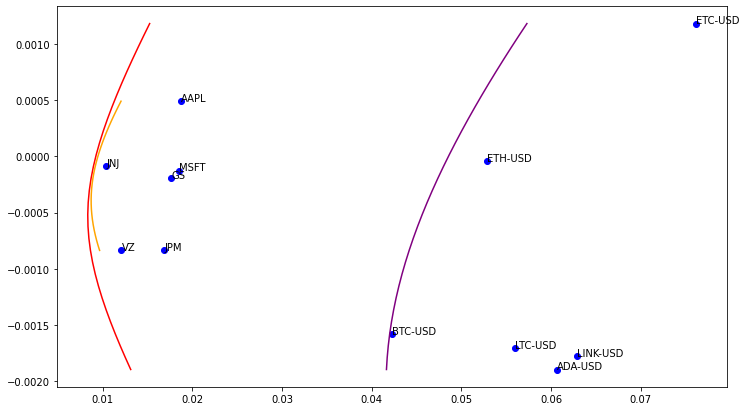

In [64]:
ror_both_sd, ror_both_mu, ror_both_cov = stats(rorBoth)

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111)

ax.scatter(ror_both_sd, ror_both_mu, color='blue')

for ticker, stdev, mean in zip(total_tickers, ror_both_sd, ror_both_mu):
    ax.annotate(ticker, xy=(stdev, mean))
    
    
bothX, bothY = EF(rorBoth)
stkX, stkY = EF(rorStock)
crpX, crpY = EF(rorCrypto)

ax.plot(bothX, bothY, color='red')
ax.plot(stkX, stkY, color='orange')
ax.plot(crpX, crpY, color='purple')